In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yaml
import numpy as np
from sklearn.metrics import r2_score

from uvsw_part import simulation

In [22]:
cfg = yaml.safe_load(open('example.in.yaml', 'r'))

In [23]:
cfg

{'cable': {'type': 'None', 'length': 1.0, 'tension': 32000.0, 'h': 500.0},
 'conductor': {'m': 1.57, 'd': 0.025, 'EA': 0.0},
 'simulation': {'ns': 101,
  'tf': 4.0,
  'dt': 0.0002,
  'dr': 0.001,
  'si': 99,
  'pp': True},
 'wakeosc': {'u': 0.9,
  'st': 0.235,
  'cl0': 0.6,
  'eps': 0.3,
  'al': 0.1,
  'bt': 0.0,
  'gm': 0.0,
  'md': 1,
  'y0': 0.0,
  'q0': 0.05}}

In [24]:
data_list = pd.read_csv("C:/Users/ksour/Downloads/RTE/awakosc/uvsw_part/test/List1.txt" , delim_whitespace=True)
data_list.head()

,nc,md,U[m/s],d[m],m[kg/m],L[m],H[N],Nt,Dt[s],tf[s],ymax,[m],filename
0,1,1,0.90,0.025,1.57,1,500,18015,0.0004,7.2060,7.681950e-08,Data1.1.bin,NaN
1,2,1,0.92,0.025,1.57,1,500,100000,0.0004,40.0000,2.049360e-04,Data1.2.bin,NaN
2,3,1,0.95,0.025,1.57,1,500,38068,0.0004,15.2272,2.684940e-05,Data1.3.bin,NaN
3,4,1,0.99,0.025,1.57,1,500,26408,0.0004,10.5632,1.799240e-05,Data1.4.bin,NaN
4,5,1,1.01,0.025,1.57,1,500,42788,0.0004,17.1152,1.771030e-05,Data1.5.bin,NaN


In [25]:
data_list.describe()

,nc,md,U[m/s],d[m],m[kg/m],L[m],H[N],Nt,Dt[s],tf[s],ymax,filename
count,31.000000,31.0,31.000000,3.100000e+01,31.00,31.0,31.000000,31.000000,31.000000,31.000000,3.100000e+01,0.0
mean,16.000000,1.0,3.462742,2.500000e-02,1.57,1.0,9451.612903,55537.935484,0.000277,16.086142,7.605330e-04,NaN
std,9.092121,0.0,2.339821,1.058039e-17,0.00,0.0,11622.072993,24297.548616,0.000126,12.729271,5.788313e-04,NaN
min,1.000000,1.0,0.900000,2.500000e-02,1.57,1.0,500.000000,10000.000000,0.000100,4.000000,7.681950e-08,NaN
25%,8.500000,1.0,1.895000,2.500000e-02,1.57,1.0,2000.000000,50000.000000,0.000200,8.603000,2.672550e-04,NaN
50%,16.000000,1.0,3.750000,2.500000e-02,1.57,1.0,8000.000000,50000.000000,0.000200,10.000000,6.324810e-04,NaN
75%,23.500000,1.0,3.842500,2.500000e-02,1.57,1.0,8000.000000,50000.000000,0.000400,20.000000,1.148610e-03,NaN
max,31.000000,1.0,7.750000,2.500000e-02,1.57,1.0,32000.000000,100000.000000,0.000400,40.000000,1.863200e-03,NaN


In [26]:
set_params = data_list.iloc[25,:]

In [27]:
cfg.keys()

dict_keys(['cable', 'conductor', 'simulation', 'wakeosc'])

In [28]:
cfg["cable"]["tension"] = np.float(set_params["H[N]"])
cfg["cable"]["length"] = np.float(set_params["L[m]"])
cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
cfg["simulation"]["dt"] = float(set_params["Dt[s]"])
cfg["wakeosc"]["md"] = np.float(set_params["md"])


In [29]:
cfg

{'cable': {'type': 'None', 'length': 1.0, 'tension': 32000.0, 'h': 500.0},
 'conductor': {'m': 1.57, 'd': 0.025, 'EA': 0.0},
 'simulation': {'ns': 101,
  'tf': 5.0,
  'dt': 0.0001,
  'dr': 0.001,
  'si': 99,
  'pp': True},
 'wakeosc': {'u': 7.58,
  'st': 0.235,
  'cl0': 0.6,
  'eps': 0.3,
  'al': 0.1,
  'bt': 0.0,
  'gm': 0.0,
  'md': 1.0,
  'y0': 0.0,
  'q0': 0.05}}

# <center>Simulation différentes valeurs de h avec H_list</center>

In [31]:
set_params = data_list.iloc[14,:]
#tension_list = [32100, 32200, 32300, 32400]
h_list = [100, 1000, 5000, 10000]
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

if __name__ == '__main__':
    for h_value in h_list: 
        print("################ h value: {} ################".format(h_value))
        cfg = yaml.safe_load(open('example.in.yaml', 'r'))
       
        cfg["cable"]["tension"] = 112100.
        cfg["cable"]["h"] = np.float(h_value)
        cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
        
        cfg["wakeosc"]["u"] = 2.15
        
        
      
        print("u value: ", cfg["wakeosc"]["u"], " tf value: ", cfg["simulation"]["tf"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])

        dfy, _ = simulation.run_cable_wakeosc(cfg)

        #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
              
        plt.figure(figsize = (20,5))
        plt.plot(ref['time'], ref['y/d'])
        plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "TS_5")
        plt.xlabel('time (s)')
        plt.ylabel('y/d')
        plt.legend()
        plt.savefig('image_simul/H='+str(h_value)+'.png')
       
        plt.show()
        

################ h value: 100 ################
u value:  2.15  tf value:  13.3264
 -- running  7.83%

KeyboardInterrupt: 

# <center>Simulation différentes valeurs de Tensions avec T_list</center>

In [ ]:
set_params = data_list.iloc[14,:]
#tension_list = [32100, 32200, 32300, 32400]
T_list = [100, 1000, 5000, 10000]
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

if __name__ == '__main__':
    for T_value in T_list: 
        print("################ h value: {} ################".format(h_value))
        cfg = yaml.safe_load(open('example.in.yaml', 'r'))
       
        cfg["wakeosc"]["u"] = 0.5
        cfg["cable"]["h"] = 100.
        cfg["cable"]["tension"] = np.float(T_value)
        cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
        
        
        
      
        print("u value: ", cfg["wakeosc"]["u"], " tf value: ", cfg["simulation"]["tf"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])

        dfy, _ = simulation.run_cable_wakeosc(cfg)

        #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
              
        plt.figure(figsize = (20,5))
        plt.plot(ref['time'], ref['y/d'])
        plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "TS_15")
        plt.xlabel('time (s)')
        plt.ylabel('y/d')
        plt.legend()
        plt.savefig('image_simul/T='+str(T_value)+'.png')
       
        plt.show()

In [39]:
ref.set_index("time", inplace = True)

In [ ]:
ref

In [36]:
dfy

,s=0.010,s=0.020,s=0.030,s=0.040,s=0.050,s=0.060,s=0.070,s=0.080,s=0.090,s=0.100,...,s=0.900,s=0.910,s=0.920,s=0.930,s=0.940,s=0.950,s=0.960,s=0.970,s=0.980,s=0.990
0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.001,1.042167e-11,2.083306e-11,3.122389e-11,4.158390e-11,5.190288e-11,6.217063e-11,7.237703e-11,8.251200e-11,9.256555e-11,1.025277e-10,...,1.025277e-10,9.256555e-11,8.251200e-11,7.237703e-11,6.217063e-11,5.190288e-11,4.158390e-11,3.122389e-11,2.083306e-11,1.042167e-11
0.002,4.151558e-11,8.299019e-11,1.243829e-10,1.656529e-10,2.067593e-10,2.476618e-10,2.883198e-10,3.286933e-10,3.687424e-10,4.084276e-10,...,4.084276e-10,3.687424e-10,3.286933e-10,2.883198e-10,2.476618e-10,2.067593e-10,1.656529e-10,1.243829e-10,8.299019e-11,4.151558e-11
0.003,9.276405e-11,1.854365e-10,2.779260e-10,3.701413e-10,4.619912e-10,5.533852e-10,6.442331e-10,7.344452e-10,8.239325e-10,9.126067e-10,...,9.126067e-10,8.239325e-10,7.344452e-10,6.442331e-10,5.533852e-10,4.619912e-10,3.701413e-10,2.779260e-10,1.854365e-10,9.276405e-11
0.004,1.632981e-10,3.264351e-10,4.892500e-10,6.515820e-10,8.132710e-10,9.741574e-10,1.134082e-09,1.292888e-09,1.450418e-09,1.606517e-09,...,1.606517e-09,1.450418e-09,1.292888e-09,1.134082e-09,9.741574e-10,8.132710e-10,6.515820e-10,4.892500e-10,3.264351e-10,1.632981e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.996,1.082632e-07,-8.620539e-07,-2.111712e-06,-2.578704e-06,-1.813597e-06,-3.759883e-07,5.843781e-07,2.403846e-07,-1.204930e-06,-2.597927e-06,...,-2.597927e-06,-1.204930e-06,2.403847e-07,5.843781e-07,-3.759883e-07,-1.813598e-06,-2.578704e-06,-2.111712e-06,-8.620539e-07,1.082632e-07
9.997,2.122245e-07,-5.887857e-07,-1.744768e-06,-2.280675e-06,-1.702937e-06,-4.205208e-07,5.518127e-07,3.878350e-07,-8.523614e-07,-2.187145e-06,...,-2.187145e-06,-8.523614e-07,3.878351e-07,5.518127e-07,-4.205209e-07,-1.702937e-06,-2.280675e-06,-1.744768e-06,-5.887856e-07,2.122245e-07
9.998,3.119462e-07,-3.073641e-07,-1.351165e-06,-1.946639e-06,-1.564128e-06,-4.563106e-07,5.121900e-07,5.293456e-07,-4.870302e-07,-1.741574e-06,...,-1.741574e-06,-4.870301e-07,5.293456e-07,5.121900e-07,-4.563106e-07,-1.564128e-06,-1.946639e-06,-1.351165e-06,-3.073640e-07,3.119462e-07
9.999,4.064774e-07,-2.164413e-08,-9.367167e-07,-1.581727e-06,-1.399324e-06,-4.826504e-07,4.664844e-07,6.631734e-07,-1.142349e-07,-1.267933e-06,...,-1.267933e-06,-1.142348e-07,6.631734e-07,4.664844e-07,-4.826505e-07,-1.399324e-06,-1.581727e-06,-9.367166e-07,-2.164409e-08,4.064774e-07


In [45]:
dfy.iloc[1:5,1:4]

,s=0.020,s=0.030,s=0.040
0.001,2.083306e-11,3.122389e-11,4.158390e-11
0.002,8.299019e-11,1.243829e-10,1.656529e-10
0.003,1.854365e-10,2.779260e-10,3.701413e-10
0.004,3.264351e-10,4.892500e-10,6.515820e-10


In [48]:
dfy.loc[0.001:0.005,"s=0.020":"s=0.040"]

,s=0.020,s=0.030,s=0.040
0.001,2.083306e-11,3.122389e-11,4.158390e-11
0.002,8.299019e-11,1.243829e-10,1.656529e-10
0.003,1.854365e-10,2.779260e-10,3.701413e-10
0.004,3.264351e-10,4.892500e-10,6.515820e-10


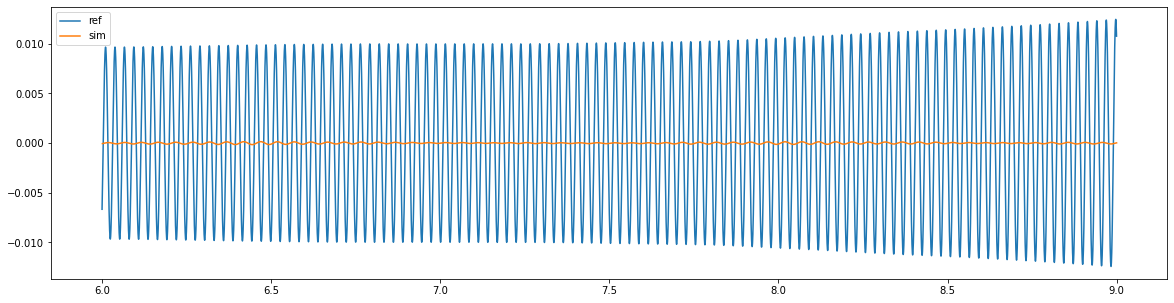

In [49]:
ref_signal = ref['y/d']
sim_signal = dfy['s=0.250']/0.025
seg_ref_signal = ref_signal.loc[6:9,]
seg_sim_signal = sim_signal.loc[6:9,]


plt.figure(figsize = (20,5))
plt.plot(seg_ref_signal, label = "ref")
plt.plot(seg_sim_signal, label = "sim")

plt.legend()
plt.show()


In [50]:
ref_signal

time
0.0002    -9.812084e-14
0.0004    -3.079694e-13
0.0006    -2.093879e-11
0.0008    -5.810133e-11
0.0010    -9.048364e-11
               ...     
9.9992     8.358338e-03
9.9994     8.921281e-03
9.9996     9.466219e-03
9.9998     9.992052e-03
10.0000    1.049772e-02
Name: y/d, Length: 50000, dtype: float64

In [51]:
sim_signal

0.000     0.000000e+00
0.001     9.384346e-09
0.002     3.738331e-08
0.003     8.353075e-08
0.004     1.470443e-07
              ...     
9.996    -6.813169e-05
9.997    -6.011947e-05
9.998    -5.110692e-05
9.999    -4.122750e-05
10.000   -3.062843e-05
Name: s=0.250, Length: 10001, dtype: float64

In [60]:
ref.shape

(18015, 13)

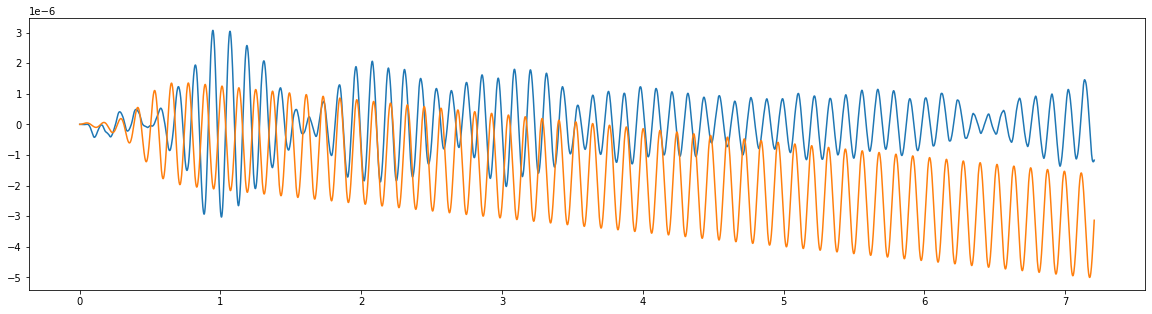

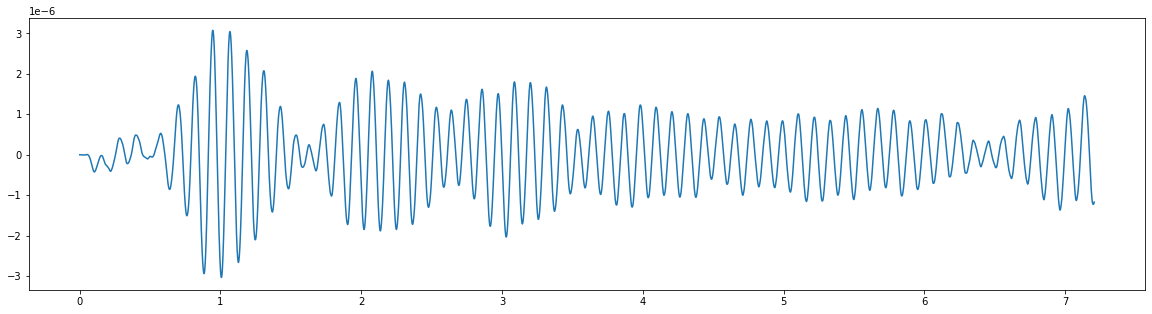

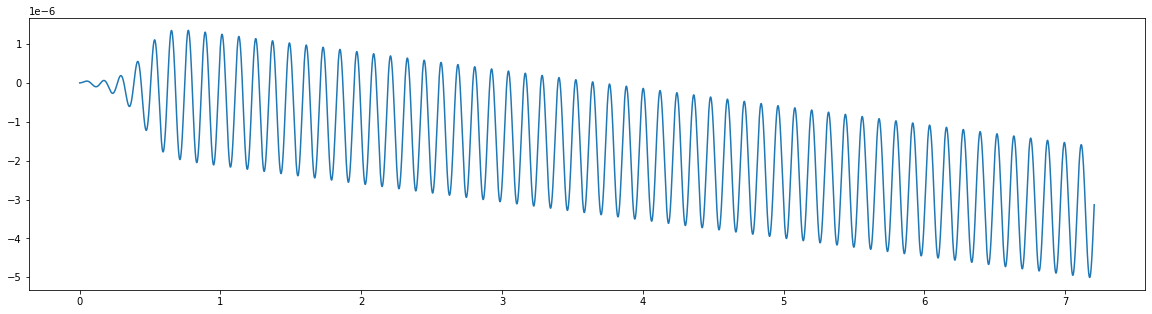

In [61]:
plt.figure(figsize = (20,5))
plt.plot(ref['time'], ref['y/d'])
plt.plot(dfy.index, dfy['s=0.250'])
plt.figure(figsize = (20,5))
plt.plot(ref['time'], ref['y/d'])
plt.figure(figsize = (20,5))
plt.plot(dfy.index, dfy['s=0.250'])

# Test pour toutes les Time Series


        ####################################################################################### 
        #                                      Serie n: 1                                     #
        #######################################################################################
        
################ U value: 0.050000000472222195 ################
h value:  400.0  tf value:  5.0


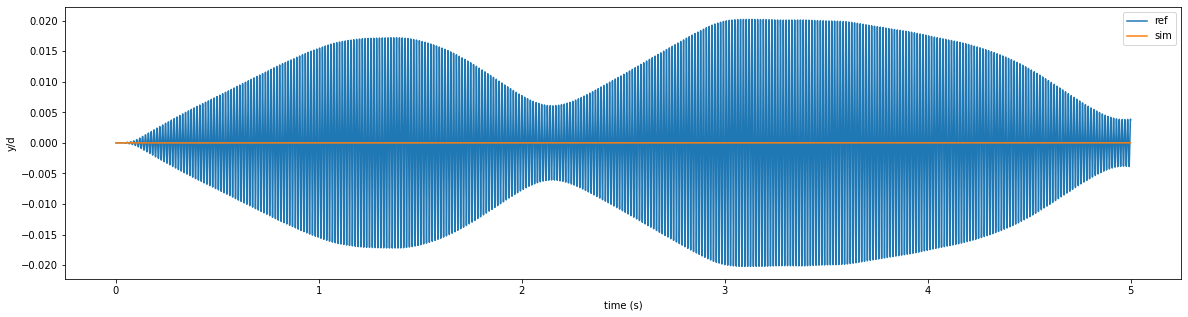

################ U value: 0.1000000004722222 ################
h value:  400.0  tf value:  5.0


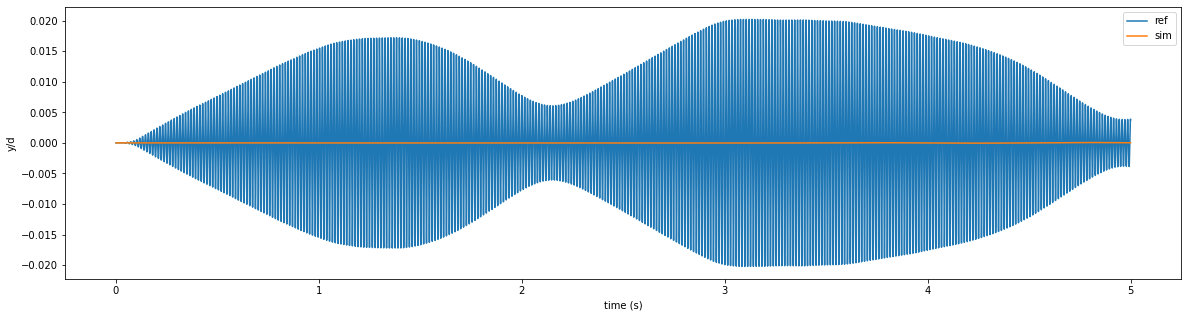

################ U value: 0.1500000004722222 ################
h value:  400.0  tf value:  5.0


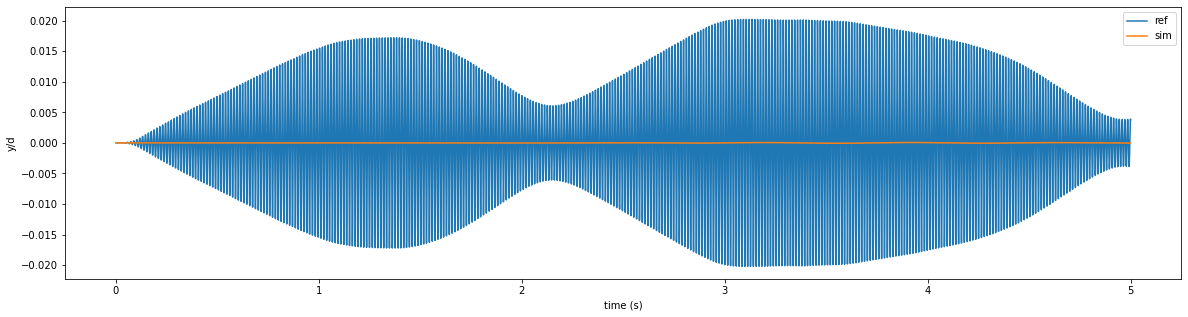

################ U value: 0.20000000047222222 ################
h value:  400.0  tf value:  5.0
 -- running 57.88%

In [ ]:
#u_list = [1, 2, 3, 4, 5, 6, 7]
if __name__ == '__main__':
    for idx, row in data_list.iterrows():
        print("""
        ####################################################################################### 
        #                                      Serie n: {}                                     #
        #######################################################################################
        """.format(set_params["nc"])
        )
        set_params = data_list.iloc[idx,:]
        ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))
        #u_list = np.arange(set_params["U[m/s]"]-set_params["U[m/s]"]/1.05882353, set_params["U[m/s]"]/2, 0.05) 
        
        
        
        for u_value in u_list: 

            print("################ U value: {} ################".format(u_value))
            cfg = yaml.safe_load(open('example.in.yaml', 'r'))
            cfg["cable"]["h"] = np.float(set_params["H[N]"])
            cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
            print("h value: ", cfg["cable"]["h"], " tf value: ", cfg["simulation"]["tf"])

            cfg["wakeosc"]["u"] = np.float(u_value)

            dfy, _ = simulation.run_cable_wakeosc(cfg)

            #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))

            plt.figure(figsize = (20,5))
            plt.plot(ref['time'], ref['y/d'], label = "ref")
            plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "sim")
            plt.xlabel('time (s)')
            plt.ylabel('y/d')

            plt.legend()
            plt.show() 

In [37]:
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

print(ref.shape)


(50000, 13)


################ Dt value: 0.0001 ################
h value:  500.0  tf value:  5.0
 -- running 100.00%
50000
--------
50001


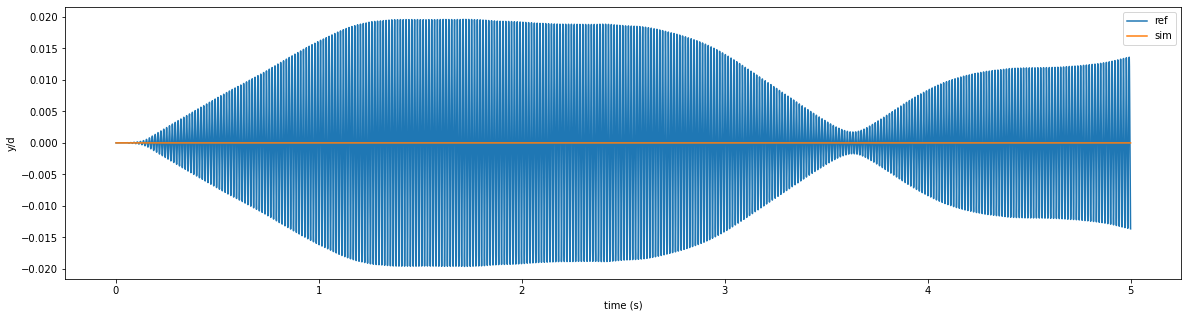

In [38]:
# modif valeur dr, dt

#set_params = data_list.iloc[5,:]
set_params = data_list.iloc[26,:]


#dr_list = [1e-5]
dr_list = [cfg["simulation"]["tf"] / len(ref)]

ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

for dr_value in dr_list: 

    print("################ Dt value: {} ################".format(dr_value))
    cfg = yaml.safe_load(open('example.in.yaml', 'r'))
    #cfg["cable"]["h"] = np.float(set_params["H[N]"])
    cfg["cable"]["tension"] = float(set_params["H[N]"])
    cfg["simulation"]["tf"] = float(set_params["tf[s]"])
    
    #cfg["simulation"]["dt"] =  0.0002 #float(set_params["Dt[s]"])
    #cfg["simulation"]["dt"] =  1e-5
    cfg["simulation"]["dt"] = cfg["simulation"]["tf"] / len(ref)
    
    
    cfg["simulation"]["dr"] = float(dr_value)
    
    
    
    print("h value: ", cfg["cable"]["h"], " tf value: ", cfg["simulation"]["tf"])

    cfg["wakeosc"]["u"] = float(set_params["U[m/s]"])

    dfy, _ = simulation.run_cable_wakeosc(cfg)

    #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
    #print(mean_squared_error(ref['y/d'],simulation['y/d'][:-1])) # Moi qui ai testé
    print("")
    print(len(ref['y/d']))
    print("--------")
    print(len(dfy['s=0.250']))

    plt.figure(figsize = (20,5))
    plt.plot(ref['time'], ref['y/d'], label = "ref")
    plt.plot(dfy.index, dfy['s=0.250'], label = "sim")
    plt.xlabel('time (s)')
    plt.ylabel('y/d')

    plt.legend()
    plt.show() 